##Import Required Lib's

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

##Data Frames To Be Used

##Steps for the preperation.

**Define a function for convertion that:**

1.   Converts time stamp into readable format for data analysis.
2.   introduces new columns namely elapsed_sec, elapsed_min, elapsed_time (format mm:ss)

**read csv files and store it into data frames.**

**define a fundtion to display the data frames.**

In [3]:


# Function to convert timestamps to elapsed time in minutes:seconds format
def convert_to_minutes_seconds(df, timestamp_column):
    df[timestamp_column] = pd.to_datetime(df[timestamp_column])
    start_time = df[timestamp_column].min()
    df['elapsed_seconds'] = (df[timestamp_column] - start_time).dt.total_seconds()
    df['elapsed_minutes'] = df['elapsed_seconds'] // 60
    df['elapsed_seconds'] = df['elapsed_seconds'] % 60
    df['elapsed_time'] = df.apply(lambda row: f"{int(row['elapsed_minutes']):02}:{int(row['elapsed_seconds']):02}", axis=1)
    return df

# Read data from CSV files
adf = pd.read_csv("Accelerometer_data.csv")
gdf = pd.read_csv("gps.csv")
hdf = pd.read_csv("heart_rate.csv")
odf = pd.read_csv("oximeter.csv")

# Convert timestamps to minutes:seconds
adf = convert_to_minutes_seconds(adf, 'Time stamp')
gdf = convert_to_minutes_seconds(gdf, 'Timestamp')
hdf = convert_to_minutes_seconds(hdf, 'time')
odf = convert_to_minutes_seconds(odf, 'Timestamp')

# Function to print DataFrame with a title
def print_dataframe(title, df):
    print(f"\n{'='*len(title)}")
    print(title)
    print(f"{'='*len(title)}")
    print(df.head())
    print("\n")

# Print the first few rows of each DataFrame with a title
print_dataframe("Accelerometer Data", adf)
print_dataframe("GPS Data", gdf)
print_dataframe("Heart Rate Data", hdf)
print_dataframe("Oximeter Data", odf)



Accelerometer Data
                        Time stamp  Acceleration Direction(vector form)  \
0 2024-05-15 03:23:44.077000+00:00           1.0    0.02i -0.12j -0.99k   
1 2024-05-15 03:23:45.075000+00:00           1.0    0.02i -0.12j -0.99k   
2 2024-05-15 03:23:46.076000+00:00           1.0    0.02i -0.12j -0.99k   
3 2024-05-15 03:23:47.075000+00:00           1.0    0.02i -0.13j -0.99k   
4 2024-05-15 03:23:48.074000+00:00           1.0    0.02i -0.13j -0.99k   

  High speed alert! Direction Aler!  elapsed_seconds  elapsed_minutes  \
0          No Alert        No Alert            0.000              0.0   
1          No Alert        No Alert            0.998              0.0   
2          No Alert        No Alert            1.999              0.0   
3          No Alert        No Alert            2.998              0.0   
4          No Alert        No Alert            3.997              0.0   

  elapsed_time  
0        00:00  
1        00:00  
2        00:01  
3        00:02  
4    

##Oximeter Data analysis and visualisation

##Smoothed line Plot (Oximeter Data)

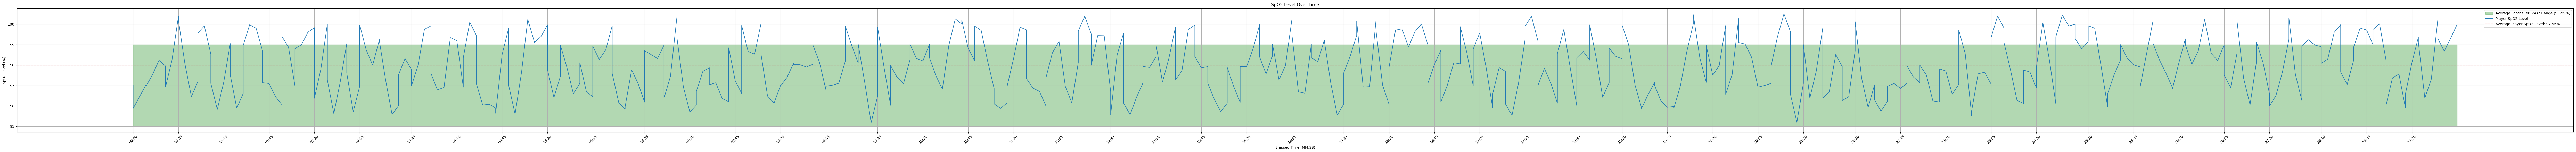

In [14]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Convert elapsed_time to numerical values for interpolation
elapsed_time_num = np.arange(len(odf['elapsed_time']))

# Interpolation
spl = make_interp_spline(elapsed_time_num, odf['SpO2_Value'], k=3)  # k=3 for cubic spline
smooth_elapsed_time = np.linspace(elapsed_time_num.min(), elapsed_time_num.max(), 500)  # 500 points for smoothness
smooth_SpO2_Value = spl(smooth_elapsed_time)

# Convert numerical values back to time strings for the x-axis labels
smooth_elapsed_time_labels = np.array(odf['elapsed_time'])[np.linspace(0, len(odf['elapsed_time']) - 1, 500).astype(int)]

# Calculate average SpO2 level of a football player
average_SpO2_Level = np.mean(odf['SpO2_Value'])  # Calculating the mean value

# Plot SpO2 Level Over Time with less congested x-axis
plt.figure(figsize=(100, 6))  # Adjust the figure size as needed

# Plot shaded green region for average oxygen level range (95-99%)
plt.fill_between(smooth_elapsed_time_labels, 95, 99, color='green', alpha=0.3, label='Average Footballer SpO2 Range (95-99%)')

# Plot player's SpO2 level
plt.plot(smooth_elapsed_time_labels, smooth_SpO2_Value, linestyle='-', label='Player SpO2 Level')

# Plot average player's SpO2 level
plt.axhline(y=average_SpO2_Level, color='r', linestyle='--', label=f'Average Player SpO2 Level: {average_SpO2_Level:.2f}%')

plt.title('SpO2 Level Over Time')
plt.xlabel('Elapsed Time (MM:SS)')
plt.ylabel('SpO2 Level (%)')
plt.grid(True)

# Set x-axis tick interval to every nth label (adjust as needed)
tick_interval = 10
plt.xticks(smooth_elapsed_time_labels[::tick_interval], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


##Histogram and KDE Plot of SpO2 Levels with Average for Football Players

##y-axis

*   This axis represents the probability density of observing a particular SpO2 level.
*   Probability density is a measure of how likely it is for the SpO2 level to fall within a specific range of values.
*    Higher density values indicate a higher likelihood of observing SpO2 levels within that range.

##x-axis

*   This axis represents the percentage of oxygen saturation in the blood (SpO2 level).
*   It ranges from 0% to 100% and indicates the amount of oxygen bound to hemoglobin in the blood.



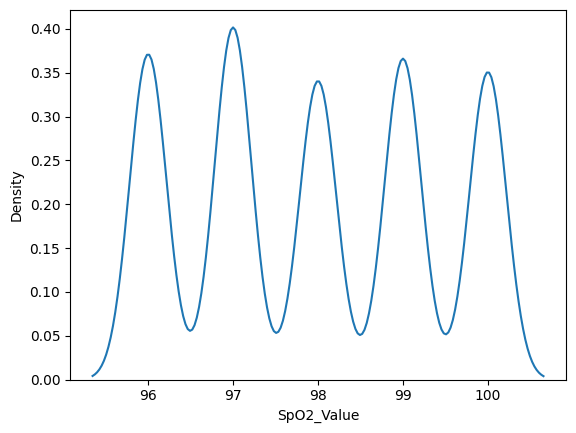

In [24]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
import seaborn as sns

# Calculate the average SpO2 level
average_SpO2 = odf['SpO2_Value'].mean()

# Create a Plotly figure
fig = make_subplots(rows=1, cols=1)

# Calculate KDE
kde_data = sns.kdeplot(odf['SpO2_Value'], bw_adjust=0.5).get_lines()[0].get_data()
kde_trace = go.Scatter(x=kde_data[0], y=kde_data[1], mode='lines', line=dict(color='navy', width=2),
                       name='KDE Curve')

# Add histogram trace
hist_trace = go.Histogram(x=odf['SpO2_Value'], histnorm='probability density', opacity=0.7,
                          marker=dict(color='rgba(0, 102, 204, 0.7)'), name='SpO2 Level (%)')

# Add average line
avg_line = go.Scatter(x=[average_SpO2, average_SpO2], y=[0, 0.05], mode='lines',
                      line=dict(color='darkred', width=2), name=f'Average SpO2 Level: {average_SpO2:.2f}%')

# Add traces to the plot
fig.add_trace(hist_trace)
fig.add_trace(kde_trace)
fig.add_trace(avg_line)

# Update layout
fig.update_layout(title='Distribution of SpO2 Levels with Average',
                  xaxis_title='SpO2 Level (%)',
                  yaxis_title='Density',
                  plot_bgcolor='white',  # Set background color to white
                  font=dict(color='black'),
                  showlegend=True,
                  legend=dict(x=0.7, y=0.95, font=dict(color='black')),
                  margin=dict(l=50, r=50, t=50, b=50))

# Show the plot
fig.show()


##Accelerometer Data Visualisation


##line plot

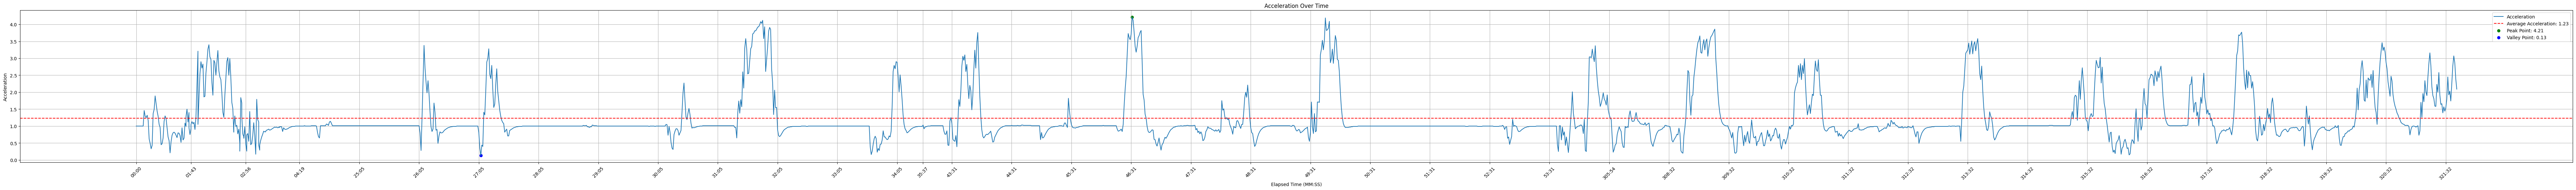

In [39]:
import matplotlib.pyplot as plt

# Calculate peak and valley points
peak_points = adf[adf['Acceleration'] == adf['Acceleration'].max()]
valley_points = adf[adf['Acceleration'] == adf['Acceleration'].min()]

# Visualization: Line plot of acceleration over time
plt.figure(figsize=(100, 6))
plt.plot(adf['elapsed_time'], adf['Acceleration'], linestyle='-', label='Acceleration')
plt.axhline(y=average_acceleration, color='r', linestyle='--', label=f'Average Acceleration: {average_acceleration:.2f}')

# Scatter plot for peak points with modified label
for i, peak in peak_points.iterrows():
    plt.scatter(peak['elapsed_time'], peak['Acceleration'], color='g', label=f'Peak Point: {peak["Acceleration"]:.2f}')

# Scatter plot for valley points with modified label
for i, valley in valley_points.iterrows():
    plt.scatter(valley['elapsed_time'], valley['Acceleration'], color='b', label=f'Valley Point: {valley["Acceleration"]:.2f}')

plt.title('Acceleration Over Time')
plt.xlabel('Elapsed Time (MM:SS)')
plt.ylabel('Acceleration')
plt.grid(True)

# Increase spacing between x-axis labels (every 60 seconds)
tick_interval = 60
plt.xticks(adf['elapsed_time'][::tick_interval], rotation=45)

# Add legend
plt.legend()

plt.show()


##Histogram

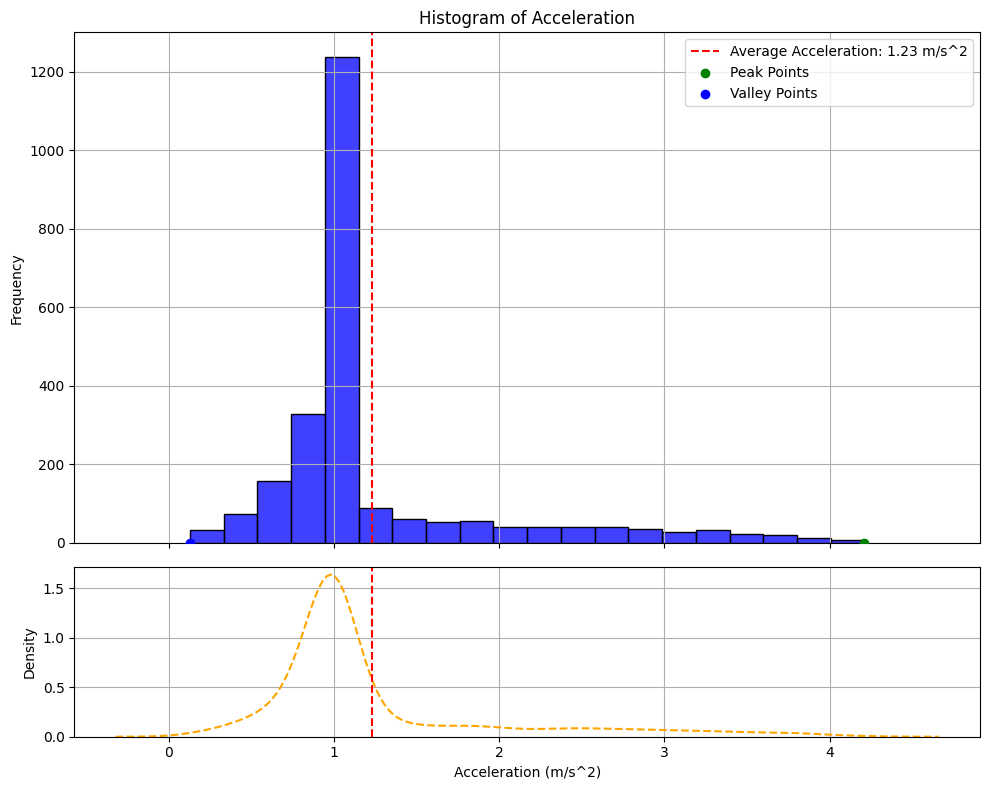

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for KDE

# Create a grid of subplots
fig, (ax_hist, ax_kde) = plt.subplots(nrows=2, sharex=True, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Histogram
sns.histplot(adf['Acceleration'], bins=20, color='blue', edgecolor='black', ax=ax_hist)
ax_hist.set_title('Histogram of Acceleration')
ax_hist.set_ylabel('Frequency')
ax_hist.grid(True)

# KDE Curve
sns.kdeplot(adf['Acceleration'], color='orange', linestyle='--', ax=ax_kde)
ax_kde.set_ylabel('Density')
ax_kde.grid(True)

# Add vertical line for average acceleration
average_acceleration = adf['Acceleration'].mean()
ax_hist.axvline(x=average_acceleration, color='r', linestyle='--', label=f'Average Acceleration: {average_acceleration:.2f} m/s^2')
ax_kde.axvline(x=average_acceleration, color='r', linestyle='--', label=f'Average Acceleration: {average_acceleration:.2f} m/s^2')

# Add labels for peak and valley points
ax_hist.scatter(peak_points['Acceleration'], [0] * len(peak_points), color='g', label='Peak Points', zorder=5)  # Zorder to ensure scatter points are on top
ax_hist.scatter(valley_points['Acceleration'], [0] * len(valley_points), color='b', label='Valley Points', zorder=5)  # Zorder to ensure scatter points are on top

# Add legend
ax_hist.legend()

plt.xlabel('Acceleration (m/s^2)')
plt.grid(True)
plt.tight_layout()
plt.show()


## GPS Data (more like distance data (no lat or long provided in csv file)).

##Line Plot

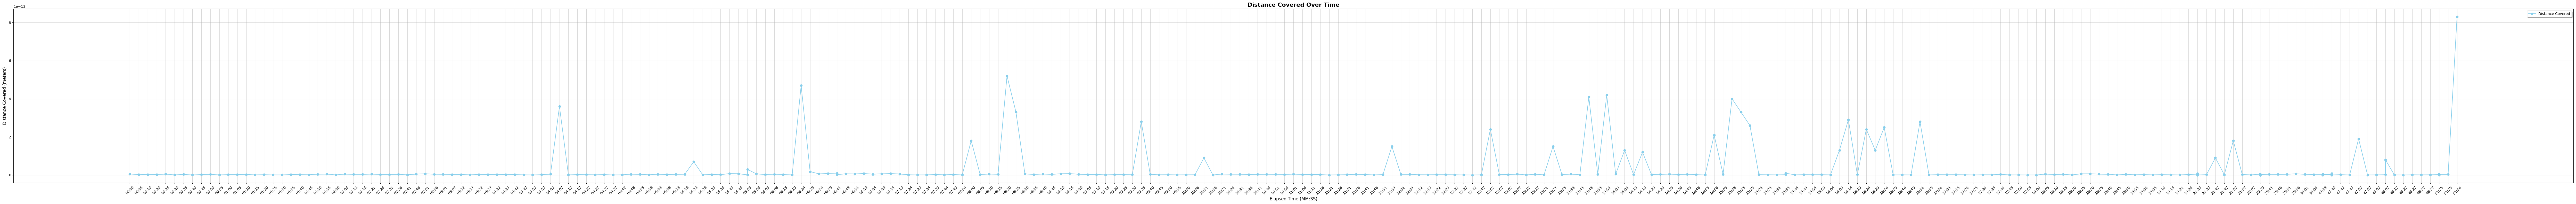

In [68]:
# Visualization 1: Line plot of distance covered over time
plt.figure(figsize=(100, 8))  # Adjust figure size for better presentation
plt.plot(gdf['elapsed_time'], gdf['Distance covered from previous time interval'], linestyle='-', color='skyblue', marker='o', markersize=6, label='Distance Covered')
plt.title('Distance Covered Over Time', fontsize=16, fontweight='bold')  # Enhance title
plt.xlabel('Elapsed Time (MM:SS)', fontsize=12)  # Increase font size for axis labels
plt.ylabel('Distance Covered (meters)', fontsize=12)
plt.grid(True, alpha=0.5)  # Adjust grid transparency
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add legend with shadow
plt.legend(loc='upper right', fontsize=10, shadow=True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


##KDE


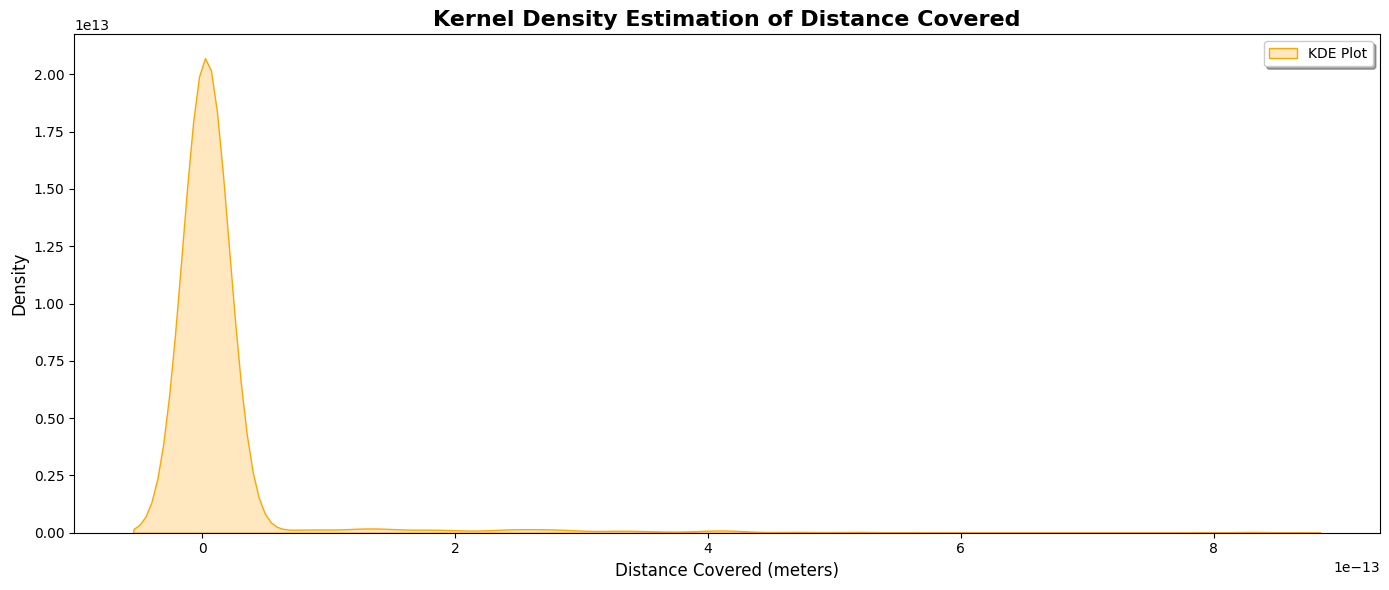

In [64]:
import seaborn as sns

# Convert distance to meters (assuming the original unit is in centimeters)
gdf['Distance covered from previous time interval'] /= 100

# Visualization 2: KDE plot of distance covered over time
plt.figure(figsize=(14, 6))
sns.kdeplot(data=gdf['Distance covered from previous time interval'], color='orange', fill=True, label='KDE Plot')
plt.title('Kernel Density Estimation of Distance Covered', fontsize=16, fontweight='bold')
plt.xlabel('Distance Covered (meters)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend with shadow
plt.legend(loc='upper right', fontsize=10, shadow=True)

plt.tight_layout()
plt.show()


##Histogram

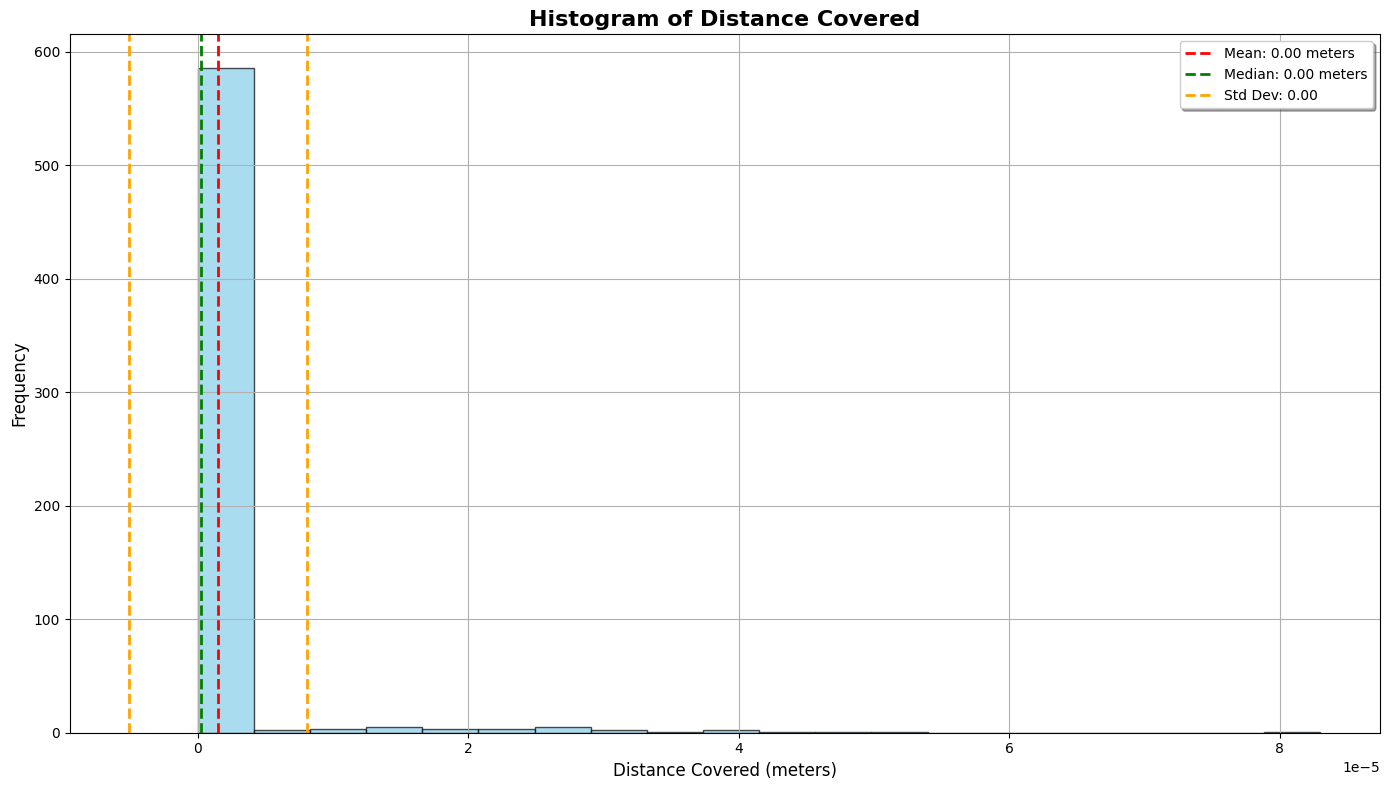

In [60]:
import numpy as np

# Calculate statistics
mean_distance = np.mean(gdf['Distance covered from previous time interval'])
median_distance = np.median(gdf['Distance covered from previous time interval'])
std_distance = np.std(gdf['Distance covered from previous time interval'])

# Visualization 2: Histogram with statistics
plt.figure(figsize=(14, 8))
plt.hist(gdf['Distance covered from previous time interval'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for mean, median, and standard deviation
plt.axvline(mean_distance, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_distance:.2f} meters')
plt.axvline(median_distance, color='green', linestyle='--', linewidth=2, label=f'Median: {median_distance:.2f} meters')
plt.axvline(mean_distance + std_distance, color='orange', linestyle='--', linewidth=2, label=f'Std Dev: {std_distance:.2f}')
plt.axvline(mean_distance - std_distance, color='orange', linestyle='--', linewidth=2)

plt.title('Histogram of Distance Covered', fontsize=16, fontweight='bold')
plt.xlabel('Distance Covered (meters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add legend with shadow
plt.legend(loc='upper right', fontsize=10, shadow=True)

plt.grid(True)
plt.tight_layout()
plt.show()


##Heart Rate

In [10]:

# Display the DataFrame to verify the changes
print(hdf.head())


                              time  Heart Rate  elapsed_seconds  \
0 2024-04-23 22:24:01.838000+00:00          79            0.000   
1 2024-04-23 22:24:02.829000+00:00          78            0.991   
2 2024-04-23 22:24:03.835000+00:00          78            1.997   
3 2024-04-23 22:24:04.840000+00:00          78            3.002   
4 2024-04-23 22:24:05.828000+00:00          78            3.990   

   elapsed_minutes elapsed_time  
0              0.0        00:00  
1              0.0        00:00  
2              0.0        00:01  
3              0.0        00:03  
4              0.0        00:03  


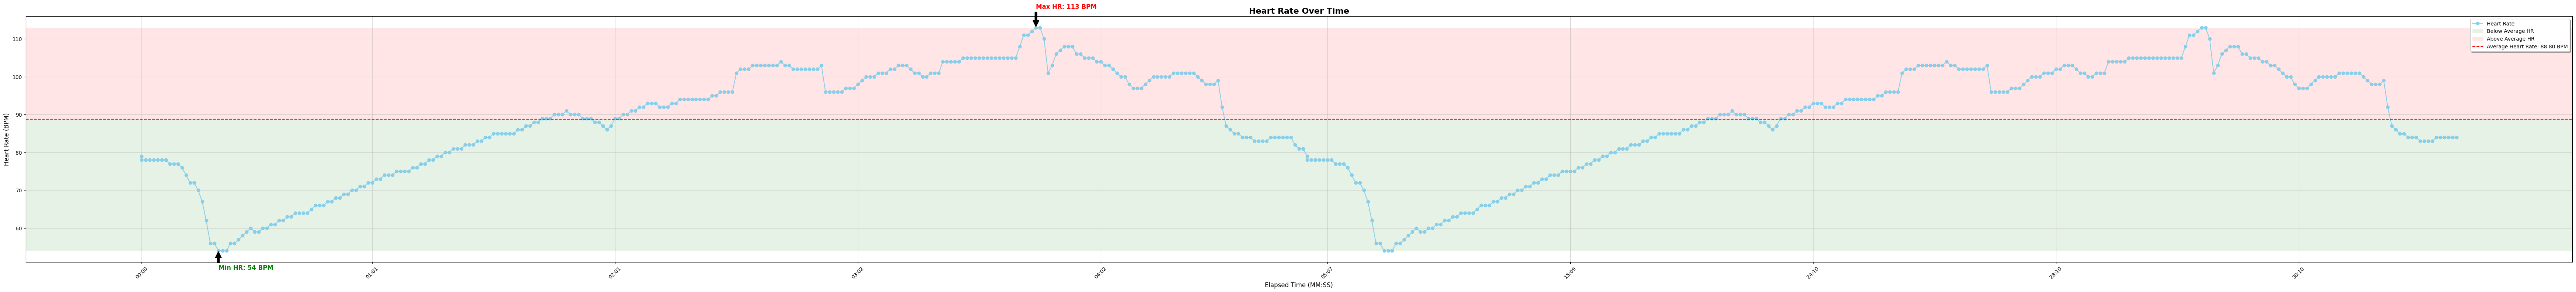

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming hdf is your DataFrame and has already been cleaned to have numeric heart rate values
# Calculate average, maximum, and minimum heart rate
average_hr = hdf['Heart Rate'].mean()
max_hr = hdf['Heart Rate'].max()
min_hr = hdf['Heart Rate'].min()

# Identify the time points of maximum and minimum heart rate
max_hr_time = hdf.loc[hdf['Heart Rate'].idxmax(), 'elapsed_time']
min_hr_time = hdf.loc[hdf['Heart Rate'].idxmin(), 'elapsed_time']

# Visualization: Line plot of heart rate over time
plt.figure(figsize=(70, 8))
plt.plot(hdf['elapsed_time'], hdf['Heart Rate'], linestyle='-', color='skyblue', marker='o', markersize=6, label='Heart Rate')
plt.title('Heart Rate Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Elapsed Time (MM:SS)', fontsize=12)
plt.ylabel('Heart Rate (BPM)', fontsize=12)

# Highlight periods of high and low heart rate
plt.axhspan(min_hr, average_hr, facecolor='green', alpha=0.1, label='Below Average HR')
plt.axhspan(average_hr, max_hr, facecolor='red', alpha=0.1, label='Above Average HR')

# Highlight the average heart rate
plt.axhline(y=average_hr, color='r', linestyle='--', label=f'Average Heart Rate: {average_hr:.2f} BPM')

# Annotate maximum and minimum heart rate
plt.annotate(f'Max HR: {max_hr} BPM', xy=(max_hr_time, max_hr), xytext=(max_hr_time, max_hr + 5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='red', fontweight='bold')
plt.annotate(f'Min HR: {min_hr} BPM', xy=(min_hr_time, min_hr), xytext=(min_hr_time, min_hr - 5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='green', fontweight='bold')

plt.grid(True, alpha=0.5)

# Increase spacing between x-axis labels (every 60 seconds)
tick_interval = 60  # Adjust this value if needed for better spacing
plt.xticks(hdf['elapsed_time'][::tick_interval], rotation=45)

# Add legend with shadow
plt.legend(loc='upper right', fontsize=10, shadow=True)

plt.tight_layout()
plt.show()


##Histogram

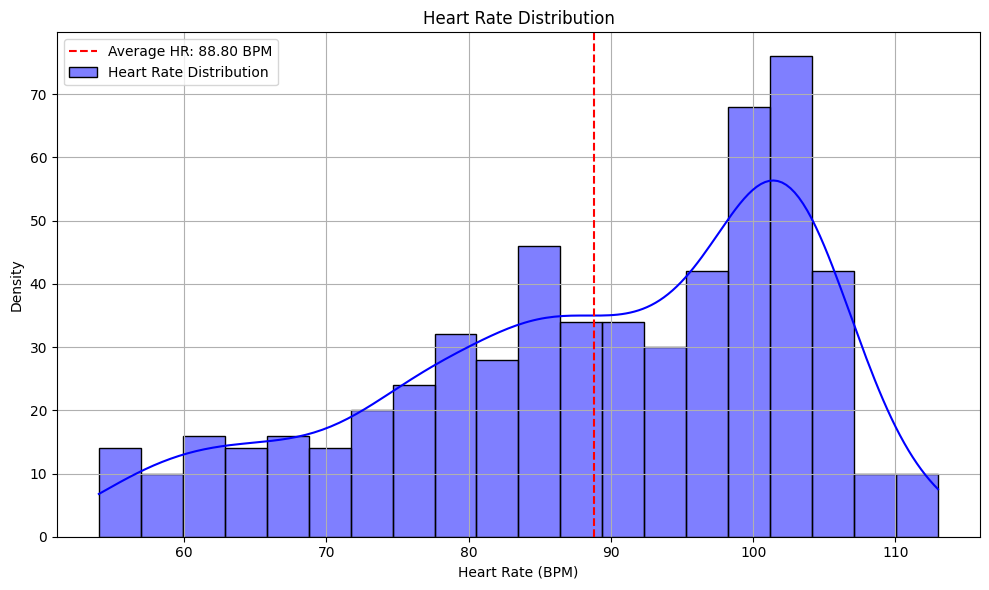

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average heart rate
average_hr = hdf['Heart Rate'].mean()

# Visualization: Histogram with KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(hdf['Heart Rate'], bins=20, kde=True, color='blue', edgecolor='black', label='Heart Rate Distribution')
plt.axvline(x=average_hr, color='r', linestyle='--', label=f'Average HR: {average_hr:.2f} BPM')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Heart rate (Heat Map)

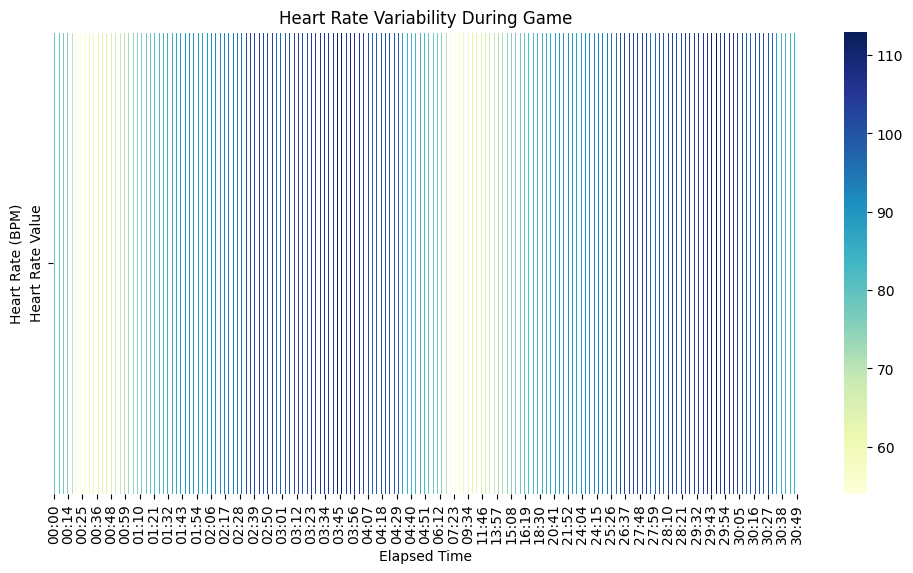

In [9]:
# Create pivot table for heatmap
hdf['Heart Rate Value'] = hdf['Heart Rate'].str.extract(r'(\d+)').astype(int)
heart_rate_pivot = hdf.pivot_table(index="elapsed_time", values="Heart Rate Value")

# Plot heatmap for heart rate variability
plt.figure(figsize=(12, 6))
sns.heatmap(heart_rate_pivot.T, cmap="YlGnBu", linewidths=.5)
plt.xlabel('Elapsed Time')
plt.ylabel('Heart Rate (BPM)')
plt.title('Heart Rate Variability During Game')
plt.show()
